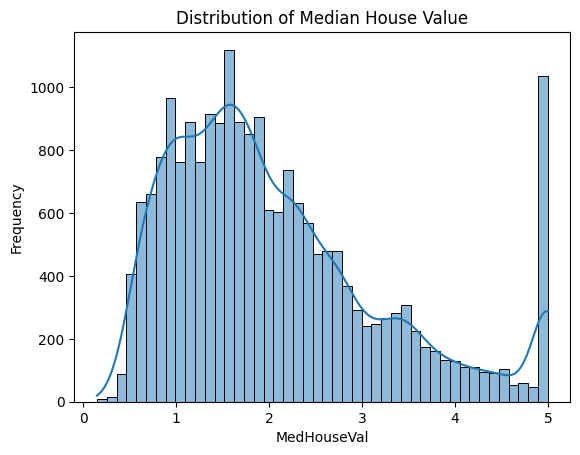

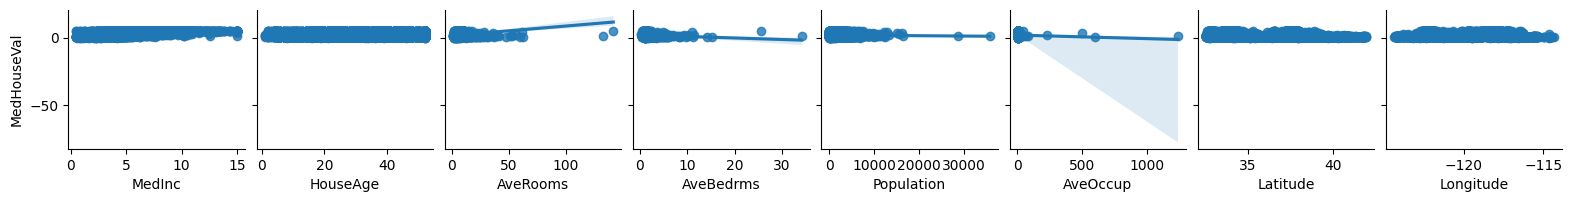

Mean Squared Error: 0.555891598695244
R-squared Score: 0.5757877060324511


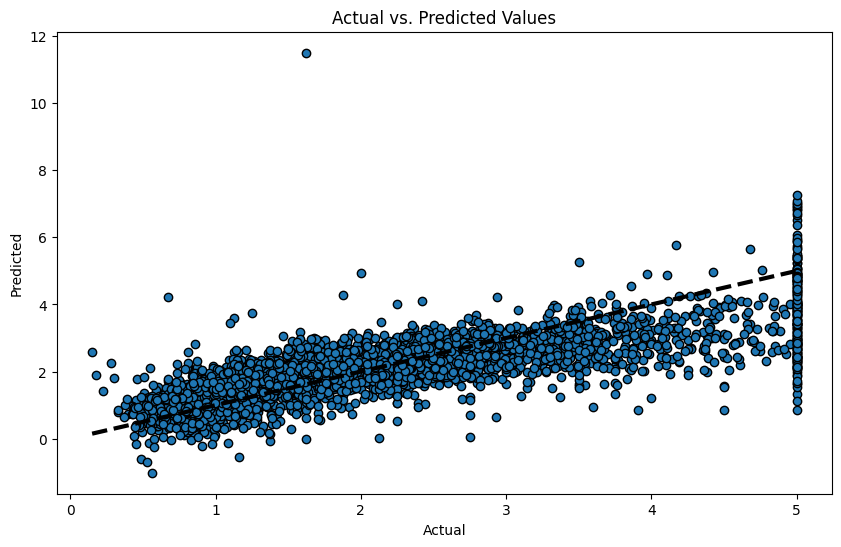

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Suppress any warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Load the California Housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Display the first few rows of the dataframe
df.head()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()

# Visualize the distribution of the target variable
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('MedHouseVal')
plt.ylabel('Frequency')
plt.show()

# Visualize relationships between features and the target variable
sns.pairplot(df, x_vars=df.columns[:-1], y_vars='MedHouseVal', kind='reg', height=2)
plt.show()

# Define the features (X) and target (y)
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()
